Import

In [3]:
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
import mlxtend
from mlxtend.plotting import plot_decision_regions
from sklearn import preprocessing


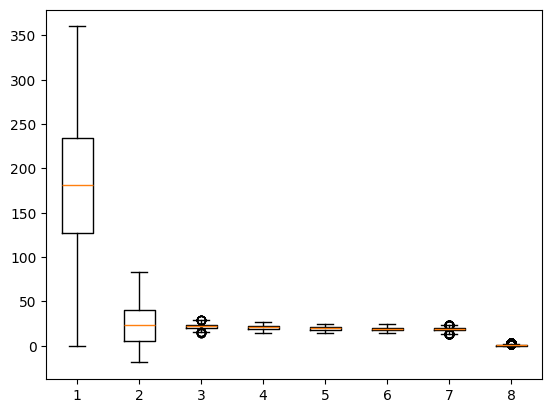

              alpha         delta             u             g             r  \
count  97814.000000  97814.000000  97814.000000  97814.000000  97814.000000   
mean     177.599567     24.150785     22.071659     20.630475     19.636028   
std       96.535545     19.654619      2.239830      2.023809      1.834898   
min        0.005528    -18.785328     14.311050     14.520380     14.168760   
25%      127.478240      5.144758     20.332845     18.938333     18.100860   
50%      180.868223     23.685853     22.157445     21.092910     20.105900   
75%      233.890810     39.908920     23.670853     22.131880     21.031697   
max      359.999810     83.000519     29.234380     26.714980     25.121300   

                  i             z      redshift  
count  97814.000000  97814.000000  97814.000000  
mean      19.065337     18.747675      0.521963  
std        1.728697      1.737013      0.595197  
min       13.899870     13.559570     -0.009971  
25%       17.699045     17.430633     

In [24]:
df = pd.read_csv('preprocessed_data.csv',index_col=0)
X = df.drop(columns=['class'])
Y = df['class']
plt.boxplot(X)
plt.show()
print(df.describe())

In [25]:
dc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')

dc.fit(X[['alpha']])
X['alpha']= dc.transform(X[['alpha']])

dc.fit(X[['delta']])
X['delta']= dc.transform(X[['delta']])

dc.fit(X[['u']])
X['u']= dc.transform(X[['u']])

dc.fit(X[['g']])
X['g']= dc.transform(X[['g']])

dc.fit(X[['r']])
X['r']= dc.transform(X[['r']])

dc.fit(X[['i']])
X['i']= dc.transform(X[['i']])

dc.fit(X[['z']])
X['z']= dc.transform(X[['z']])

dc.fit(X[['redshift']])
X['redshift']= dc.transform(X[['redshift']])

print(X.head())

   alpha  delta    u    g    r    i    z  redshift
0    3.0    5.0  7.0  7.0  5.0  5.0  5.0       3.0
1    3.0    5.0  8.0  7.0  9.0  8.0  8.0       4.0
2    3.0    5.0  8.0  7.0  6.0  5.0  5.0       3.0
3    8.0    1.0  5.0  8.0  7.0  7.0  5.0       4.0
4    9.0    3.0  2.0  1.0  1.0  1.0  1.0       0.0


Dataset 2

In [33]:
X = pd.read_csv('../Dataset/TestGroup_2b.csv')
print(X.shape)
Y = pd.read_csv('preprocessed_data.csv',index_col=0)
Y = Y.drop(columns=['alpha','delta','u','g','r','i','z','redshift'])
if type(Y) == pd.core.frame.DataFrame:
    Y = Y.iloc[:,0]
print(Y.shape)

(97814, 8)
(97814,)


SVC Setup

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.9, random_state=1)

clf = svm.SVC(kernel='rbf')
print(cross_val_score(clf, x_train, y_train, cv=10))

[0.90909091 0.92331288 0.91206544 0.88548057 0.90593047 0.90593047
 0.89877301 0.90388548 0.90797546 0.91104294]


In [7]:
kernel = ['linear','rbf','poly', 'sigmoid']
split = [0.9,0.8,0.7,0.6,0.5]
score = {
    'linear' : [],
    'rbf' : [],
    'poly' : [],
    'sigmoid' : []
}


for ky in kernel:
    print(ky)
    for sp in split:
        print(sp)
        x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=sp, random_state=1)
        clf = svm.SVC(kernel=ky)
        val = np.mean(cross_val_score(clf, x_train, y_train, cv=10))
        score[ky].append(val)
        print(val)
        


print(score)
#clf = svm.SVC(kernel='')



linear
0.9
0.9593079412028883
0.8
0.9609448490187287
0.7
0.9601283315275644
0.6
0.9610479814806396
0.5
0.9610076602448719
rbf
0.9
0.9566507078087694
0.8
0.959717933525815
0.7
0.9601281689502967
0.6
0.9617124006444879
0.5
0.9616619064522751
poly
0.9
0.9488801644347242
0.8
0.9523567540568021
0.7
0.952699154249828
0.6
0.9544536929755936
0.5
0.9546077913650504
sigmoid
0.9
0.34096778775554537
0.8
0.35492675864418327
0.7
0.4137143563856286
0.6
0.44283998804258473
0.5
0.4573352959548839
{'linear': [np.float64(0.9593079412028883), np.float64(0.9609448490187287), np.float64(0.9601283315275644), np.float64(0.9610479814806396), np.float64(0.9610076602448719)], 'rbf': [np.float64(0.9566507078087694), np.float64(0.959717933525815), np.float64(0.9601281689502967), np.float64(0.9617124006444879), np.float64(0.9616619064522751)], 'poly': [np.float64(0.9488801644347242), np.float64(0.9523567540568021), np.float64(0.952699154249828), np.float64(0.9544536929755936), np.float64(0.9546077913650504)], 'sigm

Plotting results based on hyperparameters.

Set 1

In [26]:
score = {'linear': [np.float64(0.8787450572450919), np.float64(0.8817092279510499), np.float64(0.8830764844756128), np.float64(0.8838848612746458), np.float64(0.8840042037062356)], 'rbf': [np.float64(0.9063487637107268), np.float64(0.9098768721792568), np.float64(0.9151442234554871), np.float64(0.9155524072398805), np.float64(0.916167327075857)], 'poly': [np.float64(0.8872297803985955), np.float64(0.8879461071524484), np.float64(0.8895853582912665), np.float64(0.8881788106552694), np.float64(0.8880733236080293)], 'sigmoid': [np.float64(0.3637695281901527), np.float64(0.47388377206044474), np.float64(0.4666010667391297), np.float64(0.4847296411677921), np.float64(0.48471700661329037)]}

Set 2

In [35]:
score = {'linear': [np.float64(0.9593079412028883), np.float64(0.9609448490187287), np.float64(0.9601283315275644), np.float64(0.9610479814806396), np.float64(0.9610076602448719)], 'rbf': [np.float64(0.9566507078087694), np.float64(0.959717933525815), np.float64(0.9601281689502967), np.float64(0.9617124006444879), np.float64(0.9616619064522751)], 'poly': [np.float64(0.9488801644347242), np.float64(0.9523567540568021), np.float64(0.952699154249828), np.float64(0.9544536929755936), np.float64(0.9546077913650504)], 'sigmoid': [np.float64(0.34096778775554537), np.float64(0.35492675864418327), np.float64(0.4137143563856286), np.float64(0.44283998804258473), np.float64(0.4573352959548839)]}

Results

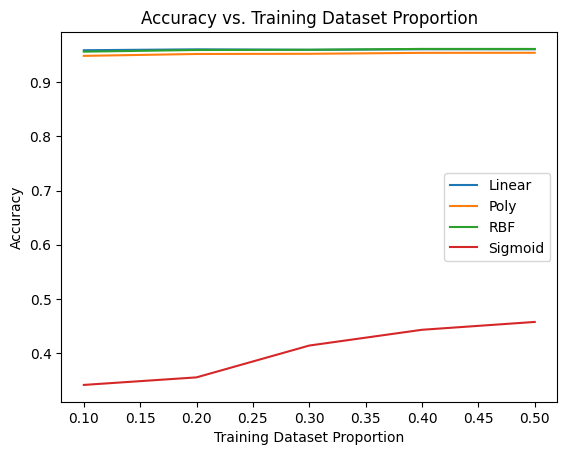

In [36]:
split = [0.9,0.8,0.7,0.6,0.5]
real_split = []
for sp in split:
    real_split.append(1-sp)

plt.plot(real_split, score['linear'])
plt.plot(real_split, score['poly'])
plt.plot(real_split, score['rbf'])
plt.plot(real_split, score['sigmoid'])
plt.xlabel('Training Dataset Proportion')
plt.ylabel('Accuracy')
plt.legend(['Linear', 'Poly', 'RBF', 'Sigmoid'])
plt.title('Accuracy vs. Training Dataset Proportion')
plt.show()

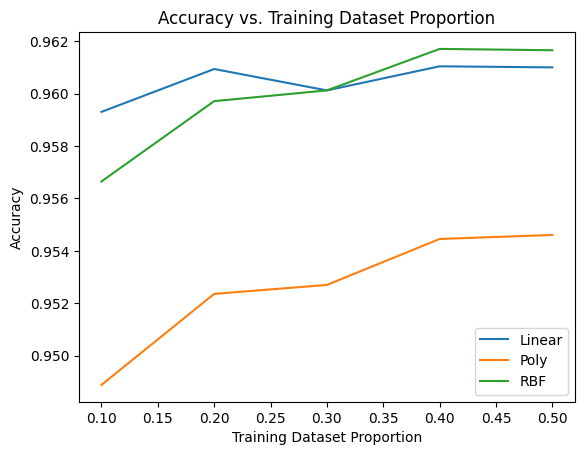

In [37]:
plt.plot(real_split, score['linear'])
plt.plot(real_split, score['poly'])
plt.plot(real_split, score['rbf'])
plt.xlabel('Training Dataset Proportion')
plt.ylabel('Accuracy')
plt.legend(['Linear', 'Poly', 'RBF'])
plt.title('Accuracy vs. Training Dataset Proportion')
plt.show()

In [38]:
print(max(score['linear']))
print(np.argmax(score['linear']))
print(max(score['rbf']))
print(np.argmax(score['rbf']))
print(max(score['poly']))
print(np.argmax(score['poly']))
print(max(score['sigmoid']))
print(np.argmax(score['sigmoid']))


0.9610479814806396
3
0.9617124006444879
3
0.9546077913650504
4
0.4573352959548839
4


In [39]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.5, random_state=1)
clf = svm.SVC(kernel='rbf', probability=True)
clf.fit(x_train, y_train)

SVC(probability=True)

In [40]:
print('Score: ', clf.score(x_test, y_test))
print('AUC: ', print(metrics.roc_auc_score(y_test, clf.predict_proba(x_test),multi_class='ovr')))
print(metrics.classification_report(y_test, clf.predict(x_test), target_names=['Galaxy','Quasar','Star']))


Score:  0.9597603615024434
0.9891349403453109
AUC:  None
              precision    recall  f1-score   support

      Galaxy       0.96      0.97      0.97     29515
      Quasar       0.96      0.88      0.92      8674
        Star       0.95      0.99      0.97     10718

    accuracy                           0.96     48907
   macro avg       0.96      0.95      0.95     48907
weighted avg       0.96      0.96      0.96     48907



Plotting an SVM

0        GALAXY
1        GALAXY
2        GALAXY
3        GALAXY
4        GALAXY
          ...  
99995    GALAXY
99996    GALAXY
99997    GALAXY
99998    GALAXY
99999    GALAXY
Name: class, Length: 97814, dtype: object
            alpha      delta         u         g         r         i  \
0      135.689107  32.494632  23.87882  22.27530  20.39501  19.16573   
1      144.826101  31.274185  24.77759  22.83188  22.58444  21.16812   
2      142.188790  35.582444  25.26307  22.66389  20.60976  19.34857   
3      338.741038  -0.402828  22.13682  23.77656  21.61162  20.50454   
4      345.282593  21.183866  19.43718  17.58028  16.49747  15.97711   
...           ...        ...       ...       ...       ...       ...   
99995   39.620709  -2.594074  22.16759  22.97586  21.90404  21.30548   
99996   29.493819  19.798874  22.69118  22.38628  20.45003  19.75759   
99997  224.587407  15.700707  21.16916  19.26997  18.20428  17.69034   
99998  212.268621  46.660365  25.35039  21.63757  19.91386  19

C:\Users\2005f\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


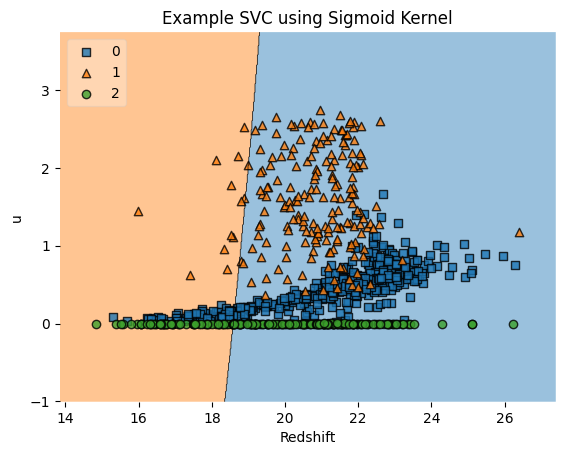

In [36]:
print(Y)
print(X)
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.99, random_state=1)

x_train = x_train.drop(columns=['alpha','delta','u','r','i','z'])
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
        
#print(y_train) 
clf = svm.SVC(kernel='sigmoid')
clf.fit(x_train, y_train)
plot_decision_regions(x_train.to_numpy(),y_train, clf=clf, legend=2)
plt.xlabel('Redshift')
plt.ylabel('u')
plt.title('Example SVC using Sigmoid Kernel')
plt.show()